In [25]:
# import libraries and load data set
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

car_data = pd.read_csv("car_data.csv")

car_data.head()


,name,year,selling_price,km_driven,mileage,engine,max_power
0,Maruti Swift Dzire VDI,2014,450000,145500,23.40,1248.0,74.00
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,21.14,1498.0,103.52
2,Honda City 2017-2020 EXi,2006,158000,140000,17.70,1497.0,78.00
3,Hyundai i20 Sportz Diesel,2010,225000,127000,23.00,1396.0,90.00
4,Maruti Swift VXI BSIII,2007,130000,120000,16.10,1298.0,88.20


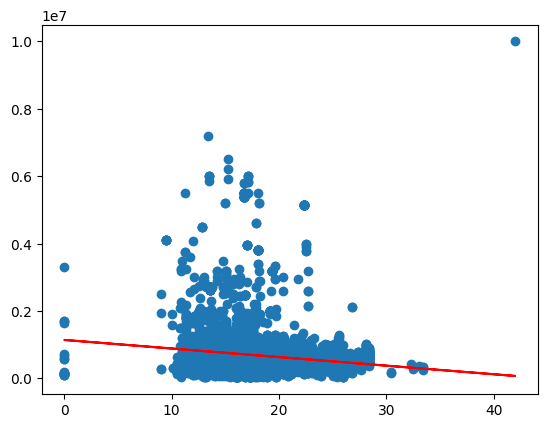

In [65]:
# select regressor and response variables
X = car_data.iloc[:,4].values.reshape(-1,1)
Y = car_data.iloc[:,2].values.reshape(-1,1)

# create a linear regression model and train the model on the data using the fit function
LR = LinearRegression()
LR.fit(X, Y)

# use the model to predict a new value of Y based on X
y_pred = LR.predict(X)

# create dataframe to compare the actual value and the predicted value
car_data_LR = pd.DataFrame({'Actual': Y.flatten(), 'Predicted': y_pred.flatten()})

plt.scatter(X,Y)
plt.plot(X, y_pred, color='red')


In [127]:
# build a lasso or ridge model
from sklearn.linear_model import Lasso, Ridge, RidgeCV
from sklearn.model_selection import RepeatedKFold


uni_data = pd.read_csv('uni_data.csv')
uni_data.head()

x = uni_data.iloc[:, 1:9]
y = uni_data.iloc[:, 9]

# define model objects
model_lasso = Lasso(0.01)
model_ridge = Ridge(10000)

# train the models
model_lasso.fit(x,y)
model_ridge.fit(x,y)

# test the prediction
new = uni_data.iloc[2199, 1:9]
model_lasso_pred = model_lasso.predict([new])
model_ridge_pred = model_ridge.predict([new])

print('Predicted: %.5f' % model_lasso_pred)
print('Predicted: %.5f' % model_ridge_pred)
print('Real Score:', uni_data.iloc[2199,9])

model_lasso_pred_2 = model_lasso.predict(x)
model_ridge_pred_2 = model_ridge.predict(x)

uni_data_lasso = pd.DataFrame({'Actual': y, 'Predicted': model_lasso_pred_2})
uni_data_ridge = pd.DataFrame({'Actual': y, 'Predicted': model_ridge_pred_2})

print(uni_data_lasso)
print(uni_data_ridge)

Predicted: 42.87696
Predicted: 42.87319
Real Score: 44.02
      Actual  Predicted
0     100.00  63.035827
1      91.67  62.861210
2      89.50  62.715757
3      86.17  62.662329
4      85.21  62.509942
...      ...        ...
2195   44.03  43.001427
2196   44.03  43.409298
2197   44.03  43.019434
2198   44.02  42.977110
2199   44.02  42.876956

[2200 rows x 2 columns]
      Actual  Predicted
0     100.00  63.023735
1      91.67  62.849380
2      89.50  62.703809
3      86.17  62.650281
4      85.21  62.499007
...      ...        ...
2195   44.03  42.997761
2196   44.03  43.413892
2197   44.03  43.015611
2198   44.02  42.973237
2199   44.02  42.873187

[2200 rows x 2 columns]


c:\Users\aferg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(
c:\Users\aferg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(
C:\Users\aferg\AppData\Local\Temp\ipykernel_324\3227478131.py:25: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Predicted: %.5f' % model_lasso_pred)
C:\Users\aferg\AppData\Local\Temp\ipykernel_324\3227478131.py:26: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (De

In [126]:
# tuning alpha/lambda
from sklearn.linear_model import Lasso, Ridge, RidgeCV
from sklearn.model_selection import RepeatedKFold

cv = RepeatedKFold(n_splits=2, n_repeats=2, random_state=1)

# define model
model = RidgeCV(alphas=np.arange(0.5,100,1), cv = cv, scoring = "neg_mean_absolute_error")

# train the model
model.fit(x,y)

# summarise the chosen configuration
print(model.alpha_)

99.5
